# 1) Questões de Negócio
Nome da Empresa: House Rocket<br>
Modelo de Negócio: Compra e venda de imóveis, obtendo lucro pela revenda.<br>
Problemas de Negócio: 
1. Quais os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez comprados, quando será a melhor época para revender e por qual preço?
3. Valide as seguintes *hipóteses de negócio*:
   1. Imóveis que possuem vista para água, são 20% mais caros, na média.
   2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
   3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.
   4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
   5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
   6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
   7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.
   8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.
   9.  Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.
   10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.

# 2) Planejamento da Solução
### Produto Final
- Dashboard disponível online 24/7, contendo:
  - 2 tabelas referentes a recomendações de imóveis e preços de compra e revenda.
  - Visualiações correspondendo a validação de cada uma das hipóteses de negócio.
### Planejamento das Ferramentas
- Python 3.10.*
- Pandas, Numpy
- Matplotlib e Seaborn
- Streamlit
- Cloud Heroku
### Processo
##### 1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?
1. Agrupar os imóveis por região;
2. Aplicar mediana do preço de cada região;
3. Selecionar imóveis que estejam abaixo do preço mediano de sua região e que estejam em boas condições;
##### 2) Uma vez comprados, quando será a melhor época para revender e por qual preço?
1. Agrupar os imóveis por região e por sazionalidade (verão e inverno);
2. Calcular preço mediano de cada grupo;
3. Selecionar aqueles imóveis que estejam em boas condições e que possuam seu preço abaixo da mediana de seu grupo; 
##### 3) Valide as seguintes *hipóteses de negócio*:
1. Imóveis que possuem vista para água, são 20% mais caros, na média.
2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.
4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.
8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.
9. Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.
10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.

# 3) Coleta e Limpeza dos Dados

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()
pd.set_option('display.float_format', '{:.2f}'.format)

In [75]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [76]:
data.shape

(21613, 21)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [78]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Checando por linhas com todos os campos duplicados.

In [79]:
data.duplicated().sum()

0

Checando por valores nulos, mas como o observado no output do método 'info()', não há valores nulos por agora.

In [80]:
data.isna().any().sum()

0

Validando os tipos dos dados das variáveis,realizando castings apropriados.

In [81]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Precisaremos realizar algumas transformações na tipologia de algumas variáveis, nomeadamente:
- date: datetime
- condition: category
- waterfront: category

In [82]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [83]:
data['condition'] = data['condition'].astype('category')
data['condition'].unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5]

In [84]:
data['waterfront'] = data['waterfront'].astype('category')
data['waterfront'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [85]:
data['view'] = data['view'].astype('category')
data['view'].unique()

[0, 3, 4, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]

In [86]:
data_numeric, data_category = data.select_dtypes(include=['int', 'float']), data.select_dtypes(exclude=['int', 'float'])

In [87]:
data_category.describe()

/tmp/ipykernel_4048/3387595875.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_category.describe()


,date,waterfront,view,condition
count,21613,21613.00,21613.00,21613.00
unique,372,2.00,5.00,5.00
top,2014-06-23 00:00:00,0.00,0.00,3.00
freq,142,21450.00,19489.00,14031.00
first,2014-05-02 00:00:00,NaN,NaN,NaN
last,2015-05-27 00:00:00,NaN,NaN,NaN


# 4) Análise Exploratória dos Dados

### Removendo outliers

In [88]:
def find_outlier_trashhold(quantile, col, data, factor=2):
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    trash_hold = iqr * factor
    if (quantile > 0.25):
        return data[col].quantile(0.75) + trash_hold
    else:
        return data[col].quantile(0.25) - trash_hold

In [110]:
def remove_outliers(data, cols):
    for col in cols:
        data = data.loc[(data[col] > find_outlier_trashhold(0.25, col, data)) & (data[col] < find_outlier_trashhold(0.75, col, data))]
    return data

In [111]:
data_shortened = data.copy()

In [112]:
# removendo outliers de todas as variáveis do dataset acima, valores acima ou abaixo de 2 vezes o valor do IQR
data_shortened = remove_outliers(data_shortened, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors'])

In [115]:
data_shortened.shape

(18243, 21)

In [116]:
data = data_shortened

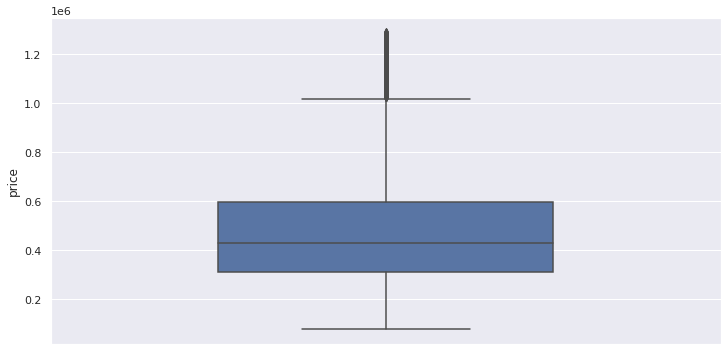

In [117]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(y=data['price'], width=.5)

plt.show()

### Gerando **Relatório 1**: 
#### **1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?**

### Gerando **Relatório 2**:
#### **2) Uma vez comprados, quando será a melhor época para revender e por qual preço?**

### Validação de Hipóteses de Negócio

#### 1. Imóveis que possuem vista para água, são 20% mais caros, na média.

#### 2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

#### 3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.

#### 4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

#### 5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

#### 6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.

#### 7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.

#### 8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.

#### 9. Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.

#### 10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.